<a href="https://colab.research.google.com/github/jangalasriramd7/MachineLearning/blob/main/DecisionTreeClassifier_on_DB_COntainer_Crane_Controller_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

#dataset information
#Speed of moving Container Crane: low, medium and high (low: 1, 2, 3; medium: 6, 7, 8; high: 9, 10).
#Angle: large negative angle, small negative angle, angle zero, small positive angle and large positive angle.
#Power: low, medium and high (low: 0.3; medium: 0.5; high: 0.7).
#more info: https://archive.ics.uci.edu/ml/datasets/Container+Crane+Controller+Data+Set

df = pd.read_csv('DB_Container_Crane_Controller_Data_Set.csv')
df.head()

,Speed,Angle,Power Zeta
0,1,-5,0.3
1,2,5,0.3
2,3,-2,0.5
3,1,2,0.5
4,2,0,0.7


In [2]:
x = df.drop(['Power Zeta'], axis = 1)
x.head()

,Speed,Angle
0,1,-5
1,2,5
2,3,-2
3,1,2
4,2,0


In [3]:
y = df[['Power Zeta']]
y.head()

,Power Zeta
0,0.3
1,0.3
2,0.5
3,0.5
4,0.7


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.40)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y_train)

'continuous'

In [8]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y_test)

'continuous'

In [9]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)

print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_test))

multiclass
binary


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
y_train

array([2, 2, 1, 1, 0, 0, 1, 1, 0])

In [11]:
y_test

array([1, 1, 0, 0, 1, 0])

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(x_train, y_train)
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [13]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [14]:
y_pred_gini = clf_gini.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.3333


In [16]:
y_pred_train_gini = clf_gini.predict(x_train)

y_pred_train_gini

array([2, 2, 0, 1, 0, 0, 1, 1, 0])

In [17]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8889


In [18]:

# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.8889
Test set score: 0.3333


[Text(251.10000000000002, 380.52, 'X[1] <= -0.591\nentropy = 1.53\nsamples = 9\nvalue = [3, 4, 2]'),
 Text(167.4, 271.8, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(334.8, 271.8, 'X[0] <= 0.387\nentropy = 1.379\nsamples = 7\nvalue = [1, 4, 2]'),
 Text(167.4, 163.07999999999998, 'X[0] <= -1.27\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(502.20000000000005, 163.07999999999998, 'X[0] <= 0.883\nentropy = 0.811\nsamples = 4\nvalue = [1, 3, 0]'),
 Text(418.5, 54.360000000000014, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(585.9, 54.360000000000014, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]')]

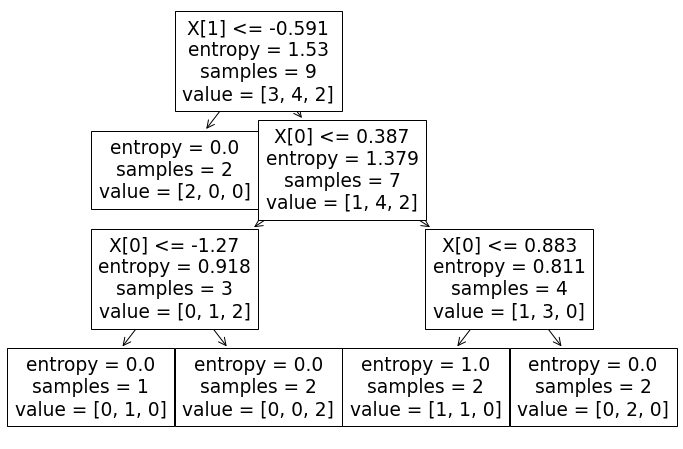

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(x_train, y_train)) 


In [21]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=x_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

AttributeError: ignored

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
plt.plot(range(1,8), error_rate,color='black',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("Test Error Rate vs K-value")
plt.xlabel('K')
plt.ylabel('Error Rate')

NameError: ignored

<Figure size 1440x432 with 0 Axes>

In [57]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

NameError: ignored